In [1]:
import os
import sys
#module_path = os.path.abspath(os.path.join('..'))
#if module_path not in sys.path:
#    sys.path.append(module_path)


In [2]:
import torch

import numpy as np
import matplotlib.pylab as plt

from os.path import join
from pathlib import Path

from models.CustomVQVAE import VQVAE_PL

import pytorch_lightning as pl

from torchvision.utils import make_grid
from customLoader import CustomHabitatData
from torchvision.transforms import transforms


In [3]:
conf = {
  'img_size': 256,
  'num_hiddens': 64,
  'num_residual_hiddens': 32,
  'num_residual_layers': 2,
  'embedding_dim': 256,
  'num_embeddings': 10,
  'commitment_cost': 0.25,
  'decay': 0.99,
  'reward_type': 'sparse'
}

In [4]:
vqvae = VQVAE_PL("pixel", **conf).cuda()
vqvae.eval()

VQVAE_PL(
  (model): PixelVQVAE(
    (_encoder): Encoder(
      (_conv_1): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_conv_2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_conv_3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_conv_4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_conv_5): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_residual_stack): ResidualStack(
        (_layers): ModuleList(
          (0): Residual(
            (_block): Sequential(
              (0): ReLU(inplace=True)
              (1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (2): ReLU(inplace=True)
              (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            )
          )
          (1): Residual(
            (_block): Sequential(
              (0): ReLU(inplace=True)
              (1): Co

In [5]:
vqvae.model._vq_vae._embedding.weight

Parameter containing:
tensor([[-0.2820, -1.3115, -0.6161,  ...,  0.9354, -1.4021,  0.8416],
        [ 1.7419,  2.2903, -1.1796,  ...,  0.0067, -0.7711,  0.6410],
        [-1.2743, -1.3541, -1.4389,  ...,  0.2402, -1.3694,  0.1857],
        ...,
        [-1.0958,  1.2584,  0.6430,  ..., -0.0231, -2.2232,  0.2141],
        [-1.3356, -1.0717,  1.5923,  ..., -0.0585, -1.3261,  0.6738],
        [-1.2314, -0.0319, -1.3837,  ..., -0.3752, -1.8409, -0.5820]],
       device='cuda:0', requires_grad=True)

In [6]:
path = './results/vqvae_depth/habitat/3mhuyyp2/checkpoints/epoch=239-step=63359.ckpt'

checkpoint = torch.load(path)
checkpoint

{'epoch': 240,
 'global_step': 63360,
 'pytorch-lightning_version': '1.1.2',
 'callbacks': {pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint: {'monitor': None,
   'best_model_score': None,
   'best_model_path': 'results/vqvae_depth/habitat/3mhuyyp2/checkpoints/epoch=238-step=63095.ckpt',
   'current_score': None}},
 'optimizer_states': [{'state': {0: {'step': 63360,
     'exp_avg': tensor([[[[ 1.0547e-02,  7.8910e-03,  7.1761e-03,  8.0918e-03],
               [ 1.1646e-02,  8.6934e-03,  8.3184e-03,  8.0643e-03],
               [ 1.1819e-02,  8.0548e-03,  7.0454e-03,  7.3378e-03],
               [ 1.0755e-02,  7.8188e-03,  7.2884e-03,  8.0660e-03]]],
     
     
             [[[ 3.7138e-03,  1.5479e-03,  3.1172e-03,  2.6637e-03],
               [ 4.1977e-03,  3.2586e-03,  3.8804e-03,  3.3439e-03],
               [ 4.1801e-03,  3.1466e-03,  2.7361e-03,  2.6271e-03],
               [ 2.8423e-03,  2.8749e-03,  2.6322e-03,  2.7261e-03]]],
     
     
             [[[-9.2846e-04,

In [7]:
vqvae.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [8]:
vqvae.model._vq_vae._embedding.weight

Parameter containing:
tensor([[-1.1973,  1.4740, -1.0725,  ...,  1.3463,  1.5410,  1.3626],
        [ 1.4432, -1.6699,  1.3201,  ..., -1.7279, -1.6216, -1.6804],
        [-0.3392,  0.5583, -0.2505,  ...,  0.2404,  0.6650,  0.3734],
        ...,
        [-0.7659,  1.0055, -0.6626,  ...,  0.8000,  1.0879,  0.8662],
        [ 1.0360, -1.1404,  0.9698,  ..., -1.2991, -1.0705, -1.2111],
        [ 0.0539,  0.1468,  0.1290,  ..., -0.2735,  0.2760, -0.0800]],
       device='cuda:0', requires_grad=True)

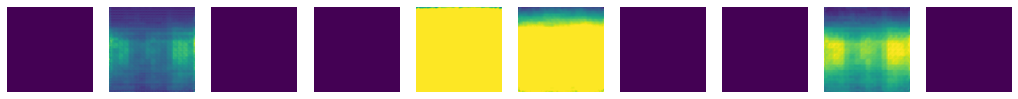

In [9]:
list_imgs, _ = vqvae.model.list_reconstructions()
fig, axes = plt.subplots(ncols=len(list_imgs), figsize=(18,10))
for i, ax in enumerate(axes):
    
    img = list_imgs[i] + 0.5
    img[img>1] = 1
    ax.imshow(img)
    ax.axis('off')

plt.savefig('./all_reconstructions_img.png')
plt.show()
    

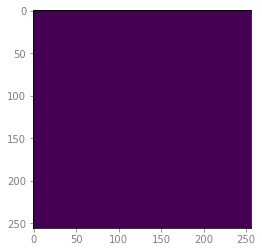

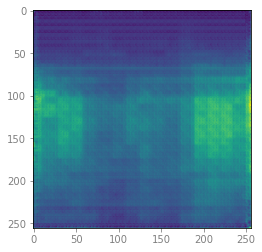

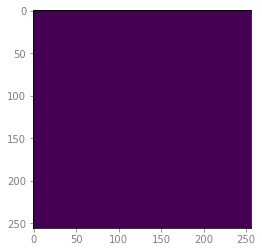

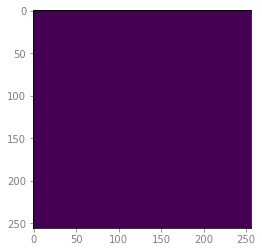

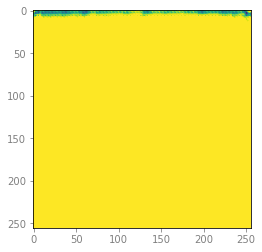

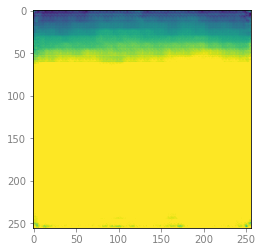

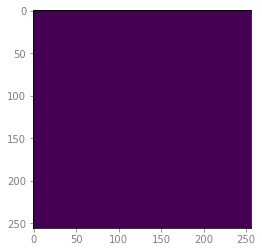

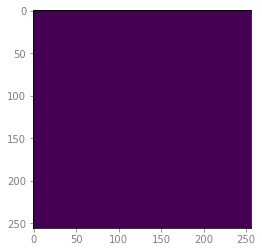

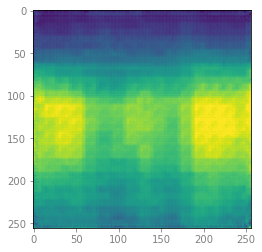

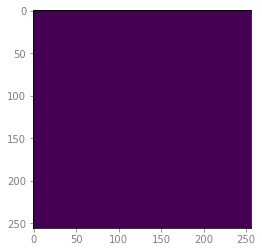

In [10]:
list_imgs, list_coords = vqvae.model.list_reconstructions()

#for i, (img, coord) in enumerate(zip(list_imgs, list_coords)):
for i, img in enumerate(list_imgs):
    fig, ax = plt.subplots()    
    img = img + 0.5
    img[img>1] = 1
    img[img<0] = 0
    ax.imshow(img)
    
    plt.savefig(f'./{i}_img.png')
    plt.show()
    #plt.imsave(f'./{i}_img.png', img)
    #with open(f'/home/juanjo/Documents/minecraft/mineRL/src/goal_states/CW4_VQVAE/{i}_coord.npy', 'wb') as f:
    #    np.save(f, coord)
    